<a href="https://colab.research.google.com/github/balams81/Rain/blob/master/Introduction_to_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Linear Regression

In this lab session we'll discuss one of the foundational algorithms in machine learning: Linear regression. We'll create a model that predicts crop yields for apples and oranges (target variables) by looking at the average temperature, rainfall, and humidity (input variables or features) in a region. Here's the training data:

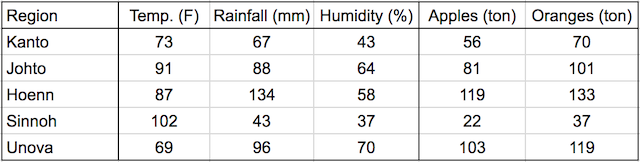

In a linear regression model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

###yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1

###yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2

Visually, it means that the yield of apples is a linear or planar function of temperature, rainfall and humidity:

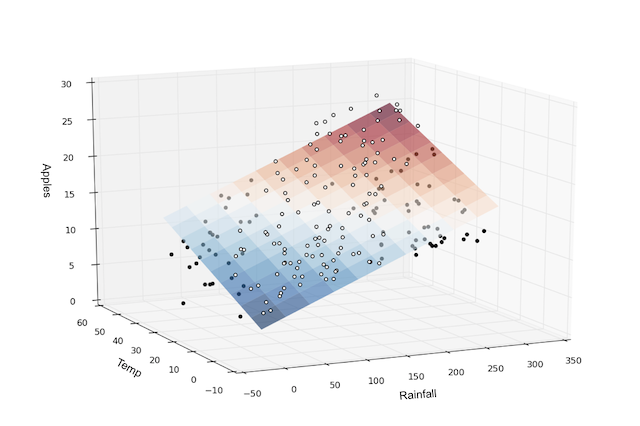

The learning part of linear regression is to figure out a set of weights w11, w12,... w23, b1 & b2 using the training data, to make accurate predictions for new data. The learned weights will be used to predict the yields for apples and oranges in a new region using the average temperature, rainfall, and humidity for that region.

We'll train our model by adjusting the weights slightly many times to make better predictions, using an optimization technique called gradient descent. Let's begin by importing Numpy and PyTorch.

# Linear Regression


In [2]:
import numpy as np
import pandas as pd
import torch

In [3]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [4]:
inputs = np.array([[73, 67, 43], 
                    [91, 88, 64], 
                    [87, 134, 58], 
                    [102, 69, 70], 
                    [69, 96, 70]], dtype='float32')

In [5]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  69.,  70.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


# #Linear regression model from scratch

The weights and biases (w11, w12,... w23, b1 & b2) can also be represented as matrices, initialized as random values. The first row of w and the first element of b are used to predict the first target variable, i.e., yield of apples, and similarly, the second for oranges.

In [6]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.6637, -0.0607, -0.0427],
        [ 2.4236, -0.5997, -0.8764]], requires_grad=True)
tensor([1.3275, 0.2297], requires_grad=True)


###torch.randn
creates a tensor with the given shape, with elements picked randomly from a normal distribution with mean 0 and standard deviation 1.

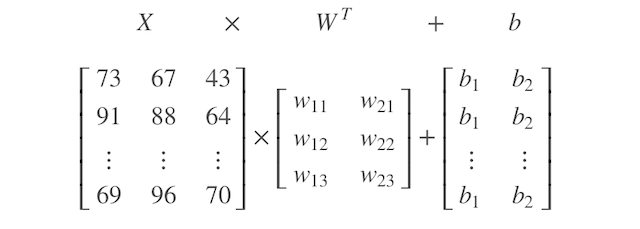



In [7]:
def model(x):
    return x @ w.t() + b

@ represents matrix multiplication in PyTorch, and the .t method returns the transpose of a tensor.

The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

In [8]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-53.0254,  99.2950],
        [-67.1429, 111.9242],
        [-67.0229,  79.9037],
        [-73.5473, 144.7195],
        [-53.2821,  48.5485]], grad_fn=<AddBackward0>)


In [9]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


Loss function

Before we improve our model, we need a way to evaluate how well our model is performing. We can compare the model's predictions with the actual targets using the following method:



*  Calculate the difference between the two matrices (preds and targets).
*  Calculate the average of the elements in the resulting matrix.
*  Square all elements of the difference matrix to remove negative values.




The result is a single number, known as the mean squared error (MSE).

In [10]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [11]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(12235.4395, grad_fn=<DivBackward0>)


Computing Gradients

In [12]:
# Compute gradients
loss.backward()

In [13]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[-0.6637, -0.0607, -0.0427],
        [ 2.4236, -0.5997, -0.8764]], requires_grad=True)
tensor([[-11630.6279, -13372.8369,  -8517.3242],
        [   927.8987,   -704.3019,    297.6016]])


Adjust weights and biases to reduce the loss

*   List item
*   List item




In [14]:
w
w.grad

tensor([[-11630.6279, -13372.8369,  -8517.3242],
        [   927.8987,   -704.3019,    297.6016]])

In [15]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

In [18]:
# Let's verify that the loss is actually lower
loss = mse(preds, targets)
print(loss)

tensor(12235.4395, grad_fn=<DivBackward0>)


In [19]:
  w.grad.zero_()
  b.grad.zero_()
  print(w.grad)
  print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


Train the model using gradient descent

In [20]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-31.9114,  98.9615],
        [-39.3385, 111.5090],
        [-34.0432,  79.8675],
        [-46.4933, 144.0506],
        [-26.4555,  48.3760]], grad_fn=<AddBackward0>)


In [21]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(8730.1895, grad_fn=<DivBackward0>)


In [22]:
# Compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ -9320.3672, -10828.2793,  -6842.9546],
        [   898.8195,   -729.5889,    277.2211]])
tensor([-111.8484,    4.5529])


In [23]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [24]:
print(w)
print(b)

tensor([[-0.4542,  0.1813,  0.1109],
        [ 2.4054, -0.5853, -0.8821]], requires_grad=True)
tensor([1.3300, 0.2296], requires_grad=True)


In [25]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(6450.3457, grad_fn=<DivBackward0>)


#Train for multiple epochs


In [26]:
# Train for 100 epochs
for i in range(500):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [27]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(327.1375, grad_fn=<DivBackward0>)


In [28]:
preds

tensor([[ 48.7836,  74.9058],
        [ 68.7388,  88.7406],
        [126.4237, 146.7057],
        [ 39.8885,  66.1225],
        [ 94.1817,  81.5065]], grad_fn=<AddBackward0>)

In [29]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [30]:
model(torch.tensor([[87, 134, 58.]]))

tensor([[126.4237, 146.7057]], grad_fn=<AddBackward0>)

In [31]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[42.8417, 70.2362]], grad_fn=<AddBackward0>)

##**Linear regression using PyTorch built-ins**

In [32]:
import torch.nn as nn

In [33]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [34]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

#Dataset and DataLoader


In [35]:
from torch.utils.data import TensorDataset

In [36]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [37]:
from torch.utils.data import DataLoader

In [38]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [39]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 92.,  87.,  64.],
        [ 74.,  66.,  43.],
        [ 73.,  67.,  43.],
        [ 68.,  96.,  71.],
        [ 87., 135.,  57.]])
tensor([[ 82., 100.],
        [ 57.,  69.],
        [ 56.,  70.],
        [104., 118.],
        [118., 134.]])


#nn.Linear


In [40]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4886,  0.5447, -0.1890],
        [ 0.4490, -0.2602,  0.2262]], requires_grad=True)
Parameter containing:
tensor([-0.4381,  0.1479], requires_grad=True)


In [41]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.4886,  0.5447, -0.1890],
         [ 0.4490, -0.2602,  0.2262]], requires_grad=True),
 Parameter containing:
 tensor([-0.4381,  0.1479], requires_grad=True)]

In [42]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ -7.7355,  25.2184],
        [ -9.0597,  32.5863],
        [ 19.0858,  17.4642],
        [-33.8441,  43.1276],
        [  4.9133,  21.9834],
        [ -8.7688,  25.9277],
        [ -9.7934,  33.0726],
        [ 18.4082,  18.1394],
        [-32.8108,  42.4184],
        [  5.2129,  21.7605],
        [ -8.4692,  25.7048],
        [-10.0930,  33.2955],
        [ 19.8195,  16.9778],
        [-34.1437,  43.3504],
        [  5.9466,  21.2741]], grad_fn=<AddmmBackward>)

#Loss Function


In [43]:
# Import nn.functional
import torch.nn.functional as F

In [44]:
# Define loss function
loss_fn = F.mse_loss

In [45]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(6418.3662, grad_fn=<MseLossBackward>)


#Optmizer

In [46]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

#Train the model


In [48]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [49]:
fit(500, model, loss_fn, opt, train_dl)

Epoch [10/500], Loss: 728.4767
Epoch [20/500], Loss: 88.2715
Epoch [30/500], Loss: 137.2887
Epoch [40/500], Loss: 82.1227
Epoch [50/500], Loss: 107.1960
Epoch [60/500], Loss: 66.2171
Epoch [70/500], Loss: 37.1175
Epoch [80/500], Loss: 33.7487
Epoch [90/500], Loss: 58.9370
Epoch [100/500], Loss: 41.0184
Epoch [110/500], Loss: 26.9701
Epoch [120/500], Loss: 28.1511
Epoch [130/500], Loss: 14.7053
Epoch [140/500], Loss: 8.0374
Epoch [150/500], Loss: 12.9320
Epoch [160/500], Loss: 15.4287
Epoch [170/500], Loss: 14.2067
Epoch [180/500], Loss: 10.1457
Epoch [190/500], Loss: 6.2650
Epoch [200/500], Loss: 3.4664
Epoch [210/500], Loss: 10.6408
Epoch [220/500], Loss: 8.6807
Epoch [230/500], Loss: 3.8503
Epoch [240/500], Loss: 10.5201
Epoch [250/500], Loss: 4.5078
Epoch [260/500], Loss: 3.3855
Epoch [270/500], Loss: 12.9419
Epoch [280/500], Loss: 4.9356
Epoch [290/500], Loss: 7.4483
Epoch [300/500], Loss: 10.3130
Epoch [310/500], Loss: 4.9403
Epoch [320/500], Loss: 4.5069
Epoch [330/500], Loss: 4.

In [50]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 57.0070,  70.4482],
        [ 81.0553,  99.8998],
        [120.3946, 133.9329],
        [ 21.4066,  38.0358],
        [ 99.7268, 117.2710],
        [ 55.7416,  69.3565],
        [ 80.7230,  99.8888],
        [120.5903, 134.4746],
        [ 22.6721,  39.1274],
        [100.6599, 118.3515],
        [ 56.6747,  70.4371],
        [ 79.7899,  98.8082],
        [120.7269, 133.9440],
        [ 20.4735,  36.9552],
        [100.9922, 118.3626]], grad_fn=<AddmmBackward>)

In [51]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [52]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[53.2470, 67.4316]], grad_fn=<AddmmBackward>)

In [53]:
model(torch.tensor([[69,96,70.]]))

tensor([[ 99.7268, 117.2710]], grad_fn=<AddmmBackward>)

#**Difference between classical programming and machine learning**

This picture from book Deep Learning with Python by Francois Chollet captures the difference between classical programming and machine learning:

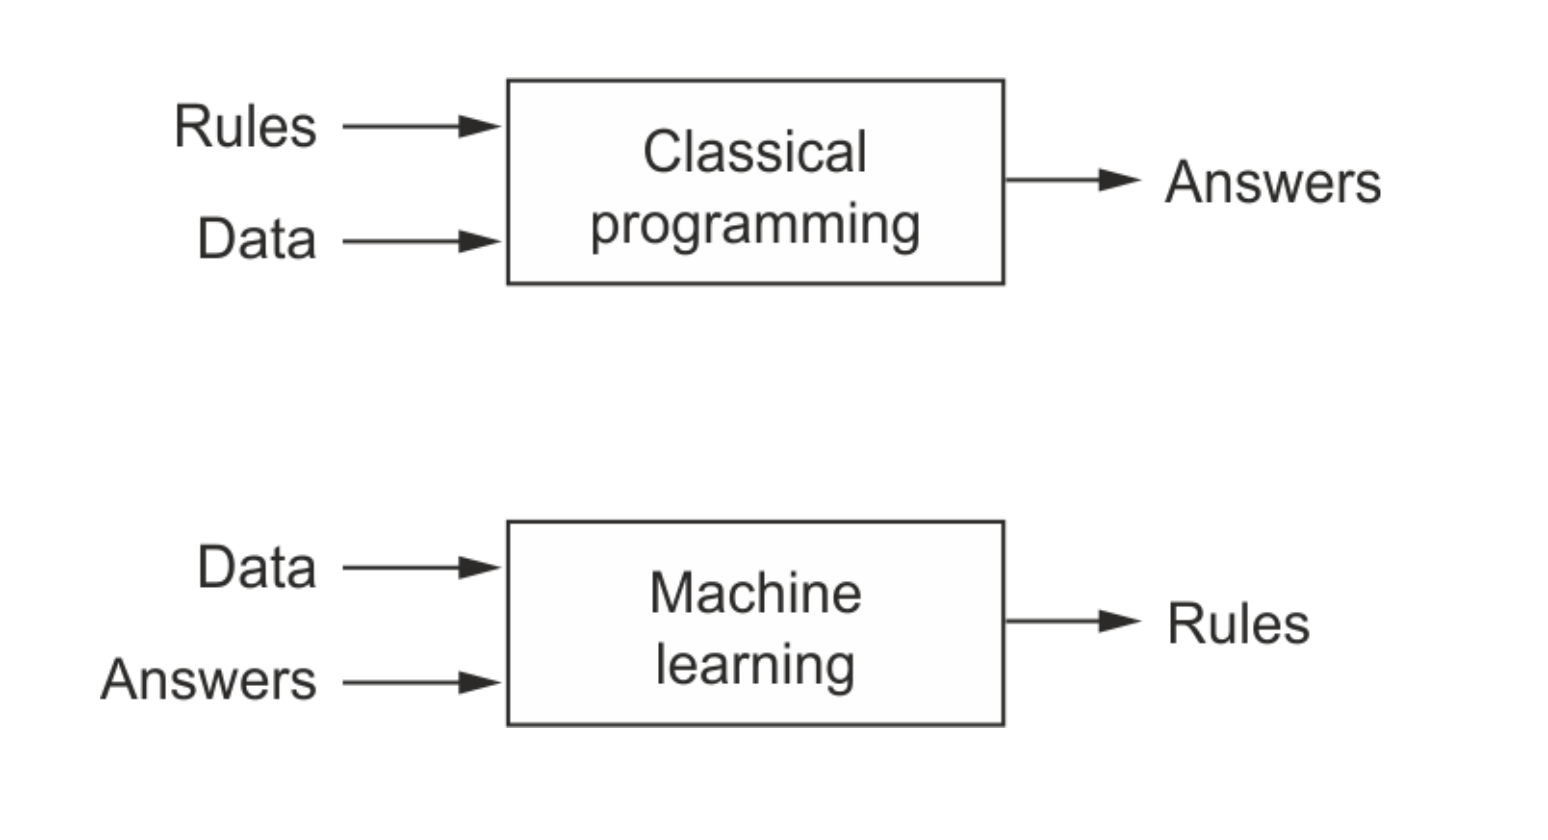